<a href="https://colab.research.google.com/github/GokulGopinath/DataAnalysisProjects/blob/master/House_Prices_Advanced_Regression_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [226]:
#installing dependencies
!pip install Kaggle


In [227]:
#upload the credentials of the kaggle account
from google.colab import files
files.upload()
#and then choose file ie generated api


Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"gokulpgopinath","key":"8938b526696c518309f26ee7a8313e90"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# change the permission
! chmod 600 ~/.kaggle/kaggle.json


In [0]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

Import the Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [155]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [157]:
id_df=pd.DataFrame(test_df['Id'])
id_df

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [158]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


**Check For Null Values**

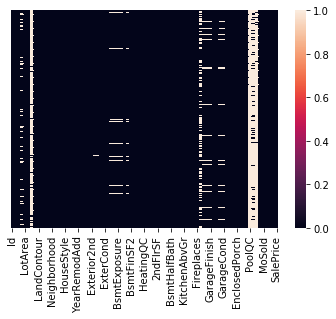

In [159]:
sns.heatmap(train_df.isnull(),yticklabels=False)

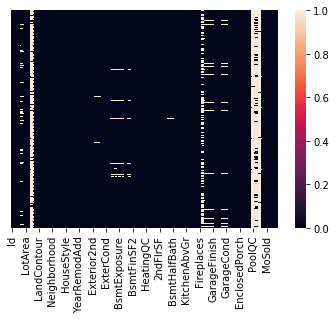

In [160]:
sns.heatmap(test_df.isnull(),yticklabels=False)

**To Check No. Of Missing Values**

In [161]:
missing_val_count_by_column = (train_df.isnull().sum())
missing_val_count_by_column[missing_val_count_by_column > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [162]:
missing_val_count_by_column = (test_df.isnull().sum())
missing_val_count_by_column[missing_val_count_by_column > 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [163]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [164]:
for col in train_df.columns:
  if train_df[col].isnull().sum()>1000:
    print(col)


Alley
PoolQC
Fence
MiscFeature


In [165]:
for col in test_df.columns:
  if test_df[col].isnull().sum()>1000:
    print(col)

Alley
PoolQC
Fence
MiscFeature


So see we understood that the missing values greater than 1000 in above col so we drop these col

In [0]:
train_df.drop(['Alley','PoolQC','Fence','MiscFeature'],inplace=True,axis=1)
test_df.drop(['Alley','PoolQC','Fence','MiscFeature'],inplace=True,axis=1)

## Handling Missing values in Train and Test df

 Lets now get categorical and continuous valued columns separated

In [167]:
train_df['BsmtCond'].nunique() #nunique fn helps to count no. of unique elements in the series excluding nan

4

Here, we are assuming that no. of distinct elements in categorical variable is 6 and greater than that is a continuous variable.variable means feature or column. 

In [0]:
train_categorical_int=[]
train_str=[]
train_continuous_int=[]
train_continuous_str=[]
train_categorical_str=[]


for col in train_df.columns:
  k=train_df[col].nunique()
  if k>6:
    if type(train_df[col].iloc[1])==str:
      train_str.append(col)  
      train_continuous_str.append(col)   
    else:
      train_continuous_int.append(col)
    
    
  else:
    if type(train_df[col].iloc[1])==str:
      train_str.append(col)   
      train_categorical_str.append(col)  
    else:
      train_categorical_int.append(col)

  




Here below ,we replace all string valued col and categorical int col with their mode and  continuous int col is replaced with their mean

In [0]:
for col in train_str:
  train_df[col]=train_df[col].fillna(train_df[col].mode()[0])

for col in train_categorical_int:
  train_df[col]=train_df[col].fillna(train_df[col].mean())
for col in train_continuous_int:
  train_df[col]=train_df[col].fillna(train_df[col].mean())
# for col in train_continuous_int:
#   print(set(train_df[col]))


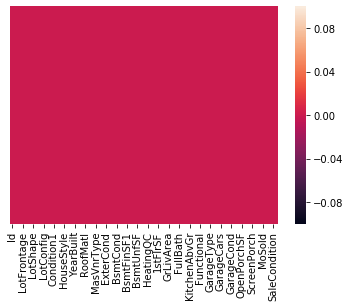

In [170]:
sns.heatmap(train_df.isnull(),yticklabels=False)

In [171]:
train_df.isnull().values.any()#see value false means that there are no missing values in train_df

False

In [172]:
# print(len(train_categorical_int))
# print(len(train_str))
# print(len(train_continuous_int))
# print(len(train_categorical_int))
# print(len(train_categorical_str))
# print(len(train_continuous_str))
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']
categorical_set=set(train_categorical_str+train_categorical_int)
# set(columns)-categorical_set
# categorical_set-set(columns)
for col in categorical_set-set(columns):
  print(col,train_df[col].nunique())

BsmtHalfBath 3
GarageCars 5
KitchenAbvGr 4
HalfBath 3
YrSold 5
Fireplaces 4
BsmtFullBath 4
FullBath 4


Now Next we have to handle missing values of test data

In [0]:
test_categorical_int=[]
test_str=[]
test_continuous_int=[]
test_continuous_str=[]
test_categorical_str=[]





for col in test_df.columns:
  k=test_df[col].nunique()
  if k>6:
    if type(test_df[col].iloc[2])==str: #index value is 2 so as 0 and 1 index are nan in some col
      test_str.append(col)  
      test_continuous_str.append(col)
    else:
      test_continuous_int.append(col)
    
    
  else:
    if type(test_df[col].iloc[2])==str:
      test_str.append(col)   
      test_categorical_str.append(col)
    else:
      test_categorical_int.append(col)






In [174]:
 for col in test_continuous_int:
   print(set(test_df[col]))

{1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 162

In [175]:
 for col in test_categorical_int:
   print(set(test_df[col]))

{0.0, 1.0, 2.0, 3.0, nan, nan}
{0.0, 1.0, 2.0, nan, nan}
{0, 1, 2, 3, 4}
{0, 1, 2}
{0, 1, 2}
{0, 1, 2, 3, 4}
{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, nan}
{2006, 2007, 2008, 2009, 2010}


In [176]:
 for col in test_str:
   print(set(test_df[col]))

{nan, 'RM', 'C (all)', 'RL', 'FV', 'RH'}
{'Grvl', 'Pave'}
{'Reg', 'IR3', 'IR1', 'IR2'}
{'Lvl', 'Bnk', 'Low', 'HLS'}
{nan, 'AllPub'}
{'CulDSac', 'FR3', 'Inside', 'Corner', 'FR2'}
{'Gtl', 'Sev', 'Mod'}
{'Gilbert', 'Mitchel', 'BrDale', 'NridgHt', 'Crawfor', 'Sawyer', 'Somerst', 'MeadowV', 'SWISU', 'Blueste', 'CollgCr', 'Blmngtn', 'IDOTRR', 'BrkSide', 'NWAmes', 'ClearCr', 'StoneBr', 'Veenker', 'NAmes', 'Timber', 'SawyerW', 'Edwards', 'OldTown', 'NPkVill', 'NoRidge'}
{'PosA', 'RRNe', 'RRAn', 'RRAe', 'RRNn', 'PosN', 'Norm', 'Feedr', 'Artery'}
{'PosA', 'PosN', 'Norm', 'Feedr', 'Artery'}
{'TwnhsE', 'Duplex', 'Twnhs', '1Fam', '2fmCon'}
{'2.5Unf', '2Story', 'SFoyer', 'SLvl', '1Story', '1.5Fin', '1.5Unf'}
{'Shed', 'Hip', 'Flat', 'Gable', 'Gambrel', 'Mansard'}
{'WdShake', 'Tar&Grv', 'WdShngl', 'CompShg'}
{nan, 'HdBoard', 'MetalSd', 'Stucco', 'WdShing', 'AsbShng', 'Plywood', 'AsphShn', 'VinylSd', 'CBlock', 'BrkFace', 'CemntBd', 'BrkComm', 'Wd Sdng'}
{nan, 'HdBoard', 'MetalSd', 'CmentBd', 'AsbShng',

we did above 3 steps to see if all the columns have string values and int values in respective col list if not then we changed the index value ie here we changed it to 2

In [0]:
for col in test_str:
  test_df[col]=test_df[col].fillna(test_df[col].mode()[0])

for col in test_categorical_int:
  test_df[col]=test_df[col].fillna(test_df[col].mean())
for col in test_continuous_int:
  test_df[col]=test_df[col].fillna(test_df[col].mean())
# for col in train_continuous_int:
#   print(set(train_df[col]))


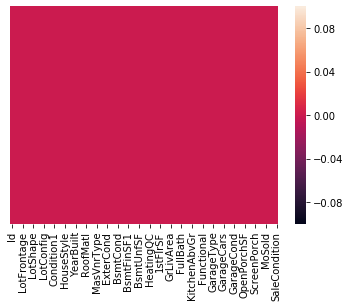

In [178]:
sns.heatmap(test_df.isnull(),yticklabels=False)

In [179]:
test_df.isnull().values.any()#see value false means that there are no missing values in train_df

False

In [180]:
set(test_categorical_str+test_categorical_int).difference(set(train_categorical_str+train_categorical_int))
print(len(set(train_df['Condition2'])),len(set(train_df['RoofMatl']))) #see condition2 and roofmat categorical in test_df but not in train_df

8 8


### Handling Categorical Features

In [181]:
train_categorical_columns=train_categorical_str+train_categorical_int
len(train_categorical_columns)


38

In [182]:
train_df.shape

(1460, 77)

In [183]:
test_df.shape[0]

1459

In [184]:
x=train_df.iloc[:,:-1]
y=train_df.iloc[:,-1]
x.columns==test_df.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [185]:
x.shape[0]

1460

In [186]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

Now we create a function which takes the columns on which we want to perform encoding. In function we do the following.We concatenate test_df and train_df.This is done because we dont have same no. of categories in both these. We apply encoding on final_df . After this we separate the test_df and train_df and return both.  

In [0]:

def convert_category(columns):
  global x
  final_df=pd.concat([x,test_df])
  x_rows=x.shape[0]
  
  for col in columns:
    dummy_cols_df=pd.get_dummies(final_df[col],drop_first=True) #drop first removes 1st out of all categorical features as it is true when all others are 0
    
    final_df=pd.concat([final_df,dummy_cols_df],axis=1)
    final_df.drop([col],inplace=True,axis=1)
  x=final_df.iloc[:x_rows,:]
  test1_df=final_df.iloc[x_rows:,:]
  return x,test1_df




In [0]:
x1,test1_df=convert_category(train_categorical_columns)

In [189]:
x

,Id,MSSubClass,LotFrontage,LotArea,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,Functional,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,FV,RH,...,Gd,Po,TA,P,Y,AdjLand,Alloca,Family,Normal,Partial,0.4344543582704187,1.0,2.0,3.0,0.06520247083047358,1.0,2.0,1,2,3,4,1,2,1,2,3,1,2,3,4,1.0,1.7661179698216736,2.0,3.0,4.0,5.0,2007,2008,2009,2010
0,1,60,65.0,8450,CollgCr,Norm,Norm,2Story,7,5,2003,2003,CompShg,VinylSd,VinylSd,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,3,8,Typ,2003.0,548.0,0,61,0,0,0,0,0,2,WD,0,0,...,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,2,20,80.0,9600,Veenker,Feedr,Norm,1Story,6,8,1976,1976,CompShg,MetalSd,MetalSd,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,3,6,Typ,1976.0,460.0,298,0,0,0,0,0,0,5,WD,0,0,...,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
2,3,60,68.0,11250,CollgCr,Norm,Norm,2Story,7,5,2001,2002,CompShg,VinylSd,VinylSd,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,3,6,Typ,2001.0,608.0,0,42,0,0,0,0,0,9,WD,0,0,...,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
3,4,70,60.0,9550,Crawfor,Norm,Norm,2Story,7,5,1915,1970,CompShg,Wd Sdng,Wd Shng,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,3,7,Typ,1998.0,642.0,0,35,272,0,0,0,0,2,WD,0,0,...,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5,60,84.0,14260,NoRidge,Norm,Norm,2Story,8,5,2000,2000,CompShg,VinylSd,VinylSd,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,4,9,Typ,2000.0,836.0,192,84,0,0,0,0,0,12,WD,0,0,...,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,Gilbert,Norm,Norm,2Story,6,5,1999,2000,CompShg,VinylSd,VinylSd,0.0,0.0,0.0,953.0,953.0,953,694,0,1647,3,7,Typ,1999.0,460.0,0,40,0,0,0,0,0,8,WD,0,0,...,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
1456,1457,20,85.0,13175,NWAmes,Norm,Norm,1Story,6,6,1978,1988,CompShg,Plywood,Plywood,119.0,790.0,163.0,589.0,1542.0,2073,0,0,2073,3,7,Min1,1978.0,500.0,349,0,0,0,0,0,0,2,WD,0,0,...,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
1457,1458,70,66.0,9042,Crawfor,Norm,Norm,2Story,7,9,1941,2006,CompShg,CemntBd,CmentBd,0.0,275.0,0.0,877.0,1152.0,1188,1152,0,2340,4,9,Typ,1941.0,252.0,0,60,0,0,0,0,2500,5,WD,0,0,...,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1458,1459,20,68.0,9717,NAmes,Norm,Norm,1Story,5,6,1950,1996,CompShg,MetalSd,MetalSd,0.0,49.0,1029.0,0.0,1078.0,1078,0,0,1078,2,5,Typ,1950.0,240.0,366,0,112,0,0,0,0,4,WD,0,0,...,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


Using label Encoder to encode remaining string features 

In [0]:
from sklearn.preprocessing import LabelEncoder
for col in train_continuous_str:
  
  labelencoder_x=LabelEncoder()
  x[col] = x[col].astype('str') #converting embarked of type object to string to apply label encoder

  x[col]=labelencoder_x.fit_transform(x[col])#converting state col strings into integer

#####For Test data set

for col in train_continuous_str: #we used train_continuous_str instead of test_continuous_str as we have converted col of train_categorical_str for test data or else if test_continuous_str was used then col: condn1 and 1 more col wouldnt be converted to float  
  
  labelencoder_x=LabelEncoder()
  test1_df[col] = test1_df[col].astype('str') #converting embarked of type object to string to apply label encoder

  test1_df[col]=labelencoder_x.fit_transform(test1_df[col])#converting state col strings into integer


## Splitting the dataset

In [191]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x

,Id,MSSubClass,LotFrontage,LotArea,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,Functional,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,FV,RH,...,Gd,Po,TA,P,Y,AdjLand,Alloca,Family,Normal,Partial,0.4344543582704187,1.0,2.0,3.0,0.06520247083047358,1.0,2.0,1,2,3,4,1,2,1,2,3,1,2,3,4,1.0,1.7661179698216736,2.0,3.0,4.0,5.0,2007,2008,2009,2010
0,1,60,65.0,8450,5,2,2,5,7,5,2003,2003,1,12,13,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,3,8,6,2003.0,548.0,0,61,0,0,0,0,0,2,8,0,0,...,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,2,20,80.0,9600,24,1,2,2,6,8,1976,1976,1,8,8,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,3,6,6,1976.0,460.0,298,0,0,0,0,0,0,5,8,0,0,...,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
2,3,60,68.0,11250,5,2,2,5,7,5,2001,2002,1,12,13,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,3,6,6,2001.0,608.0,0,42,0,0,0,0,0,9,8,0,0,...,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
3,4,70,60.0,9550,6,2,2,5,7,5,1915,1970,1,13,15,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,3,7,6,1998.0,642.0,0,35,272,0,0,0,0,2,8,0,0,...,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5,60,84.0,14260,15,2,2,5,8,5,2000,2000,1,12,13,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,4,9,6,2000.0,836.0,192,84,0,0,0,0,0,12,8,0,0,...,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,8,2,2,5,6,5,1999,2000,1,12,13,0.0,0.0,0.0,953.0,953.0,953,694,0,1647,3,7,6,1999.0,460.0,0,40,0,0,0,0,0,8,8,0,0,...,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
1456,1457,20,85.0,13175,14,2,2,2,6,6,1978,1988,1,9,10,119.0,790.0,163.0,589.0,1542.0,2073,0,0,2073,3,7,2,1978.0,500.0,349,0,0,0,0,0,0,2,8,0,0,...,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
1457,1458,70,66.0,9042,6,2,2,5,7,9,1941,2006,1,5,5,0.0,275.0,0.0,877.0,1152.0,1188,1152,0,2340,4,9,6,1941.0,252.0,0,60,0,0,0,0,2500,5,8,0,0,...,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1458,1459,20,68.0,9717,12,2,2,2,5,6,1950,1996,1,8,8,0.0,49.0,1029.0,0.0,1078.0,1078,0,0,1078,2,5,6,1950.0,240.0,366,0,112,0,0,0,0,4,8,0,0,...,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


**Converting columns into string type.**
This is because we have to use column names in standard scaler and if the col names are int or float it will treat it as row no. instead of col name

In [192]:
x_train.columns = x_train.columns.astype(str)
x_test.columns = x_test.columns.astype(str)
test1_df.columns = test1_df.columns.astype(str)
test1_df.columns.map(type)

Index([<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>,
       ...
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>],
      dtype='object', length=172)

In [193]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
xtcol=list(x_train.columns)
xtestcol=list(x_test.columns)
testcol=list(test1_df.columns)
x_train=pd.DataFrame(sc_x.fit_transform(x_train),columns=xtcol)
x_test=pd.DataFrame(sc_x.fit_transform(x_test),columns=xtestcol)
test1_df=pd.DataFrame(sc_x.fit_transform(test1_df),columns=testcol)

# x_train.columns

# df[xtcol]=sc_x.fit_transform(x_train)
# sc_x.fit_transform(x_train).shape==x_train.shape
test1_df

,Id,MSSubClass,LotFrontage,LotArea,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,Functional,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,FV,RH,...,Gd,Po,TA,P,Y,AdjLand,Alloca,Family,Normal,Partial,0.4344543582704187,1.0,2.0,3.0,0.06520247083047358,1.0,2.0,1,2,3,4,1,2,1,2,3,1,2,3,4,1.0,1.7661179698216736,2.0,3.0,4.0,5.0,2007,2008,2009,2010
0,-1.730864,-0.874711,0.555587,0.363929,-0.105672,-1.193183,0.028691,-0.431830,-0.751101,0.400766,-0.340945,-1.072885,-0.09948,0.683901,0.728946,-0.570108,0.063295,0.517348,-0.650619,-0.370808,-0.654561,-0.775254,-0.080483,-1.215588,-1.029543,-0.918335,0.25839,-0.650488,1.185945,0.366678,-0.701628,-0.360738,-0.088827,1.818960,-0.057227,-0.092244,-0.038281,0.32475,-0.231148,12.037442,...,-0.06426,-0.069433,0.194154,-0.149749,0.34849,-0.074253,-0.091066,-0.134699,0.460211,-0.299365,-0.03705,-0.816963,-0.126557,-0.026189,-0.03705,-0.257916,-0.03705,1.101799,-1.045589,-0.147339,-0.052432,-0.749732,-0.094817,0.217669,-0.214192,0.0,-0.857228,-0.277043,-0.06426,-0.026189,1.607721,-0.026189,-1.057148,-0.390447,-0.087159,-0.026189,-0.575504,-0.527923,-0.518359,2.810043
1,-1.728490,-0.874711,0.604239,0.897861,-0.105672,-0.056113,0.028691,-0.431830,-0.054877,0.400766,-0.439695,-1.214908,-0.09948,1.096219,1.048229,0.041273,1.063392,-0.297903,-0.339378,0.639144,0.433298,-0.775254,-0.080483,-0.323539,0.175997,-0.255371,0.25839,-0.767194,-0.741213,2.347867,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,19.730438,-0.038281,0.32475,-0.231148,-0.083074,...,-0.06426,-0.069433,0.194154,-0.149749,0.34849,-0.074253,-0.091066,-0.134699,0.460211,-0.299365,-0.03705,-0.816963,-0.126557,-0.026189,-0.03705,-0.257916,-0.03705,1.101799,-1.045589,-0.147339,-0.052432,1.333809,-0.094817,0.217669,-0.214192,0.0,-0.857228,-0.277043,-0.06426,-0.026189,1.607721,-0.026189,-1.057148,-0.390447,-0.087159,-0.026189,-0.575504,-0.527923,-0.518359,2.810043
2,-1.726115,0.061351,0.263676,0.809646,-0.784114,-0.056113,0.028691,0.920188,-0.751101,-0.497418,0.844059,0.678742,-0.09948,0.683901,0.728946,-0.570108,0.773254,-0.297903,-0.954994,-0.266876,-0.574165,0.891944,-0.080483,0.294508,0.175997,-0.255371,0.25839,0.749983,0.042559,0.930495,-0.207871,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-1.140614,0.32475,-0.231148,-0.083074,...,-0.06426,-0.069433,0.194154,-0.149749,0.34849,-0.074253,-0.091066,-0.134699,0.460211,-0.299365,-0.03705,-0.816963,-0.126557,-0.026189,-0.03705,-0.257916,-0.03705,-0.907607,0.956399,-0.147339,-0.052432,1.333809,-0.094817,0.217669,-0.214192,0.0,1.166551,-0.277043,-0.06426,-0.026189,-0.621998,-0.026189,0.945941,-0.390447,-0.087159,-0.026189,-0.575504,-0.527923,-0.518359,2.810043
3,-1.723741,0.061351,0.458284,0.032064,-0.784114,-0.056113,0.028691,0.920188,-0.054877,0.400766,0.876976,0.678742,-0.09948,0.683901,0.728946,-0.456889,0.357829,-0.297903,-0.527038,-0.271395,-0.579190,0.837243,-0.080483,0.243004,0.175997,0.407593,0.25839,0.788885,-0.012766,2.089451,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-0.038281,0.32475,-0.231148,-0.083074,...,-0.06426,-0.069433,0.194154,-0.149749,0.34849,-0.074253,-0.091066,-0.134699,0.460211,-0.299365,-0.03705,-0.816963,-0.126557,-0.026189,-0.03705,-0.257916,-0.03705,-0.907607,0.956399,-0.147339,-0.052432,1.333809,-0.094817,0.217669,-0.214192,0.0,1.166551,-0.277043,-0.06426,-0.026189,-0.621998,-0.026189,0.945941,-0.390447,-0.087159,-0.026189,-0.575504,-0.527923,-0.518359,2.810043
4,-1.721367,1.465443,-1.244533,-0.971808,1.590431,-0.056113,0.028691,-0.431830,1.337571,-0.497418,0.679475,0.394694,-0.09948,-0.965374,-1.186753,-0.570108,-0.387298,-0.297903,1.058917,0.528434,0.310192,-0.775254,-0.080483,-0.424487,-1.029543,-0.918335,0.25839,0.555473,0.153210,-0.729632,0.489198,-0.360738,-0.088827,2.2

In [0]:
test1_df.drop(['Id'],inplace=True,axis=1)

In [0]:
x_train.drop(['Id'],inplace=True,axis=1)
x_test.drop(['Id'],inplace=True,axis=1)

In [200]:
print(x_train.head())
print(x_test.head())
print(test1_df.head())

   MSSubClass  LotFrontage   LotArea  ...      2008      2009      2010
0   -0.868365     0.978678  0.103212  ... -0.517868 -0.536434 -0.379442
1   -0.868365    -0.467156 -0.372881  ... -0.517868  1.864161 -0.379442
2   -0.631142     0.496734  0.258919  ... -0.517868  1.864161 -0.379442
3   -0.868365     0.017197  0.250040  ...  1.930996 -0.536434 -0.379442
4   -0.868365     2.328123  0.291070  ... -0.517868 -0.536434 -0.379442

[5 rows x 171 columns]
   MSSubClass  LotFrontage   LotArea  ...      2008      2009      2010
0   -0.889592    -0.053986  3.559379  ... -0.492497 -0.598448 -0.325669
1   -0.188483     0.284548 -0.116642  ... -0.492497 -0.598448 -0.325669
2   -0.188483    -0.053986 -0.509176  ... -0.492497  1.670990 -0.325669
3    0.045220     0.435847 -0.034963  ...  2.030470 -0.598448 -0.325669
4    2.382249    -1.909290 -1.355304  ... -0.492497 -0.598448  3.070598

[5 rows x 171 columns]
   MSSubClass  LotFrontage   LotArea  ...      2008      2009      2010
0   -0.874711   

## Prediction Using Random Forest

In [206]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=300,random_state=0)
regressor.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [211]:
y_pred=regressor.predict(x_test)
y_pred #these are our redictions

array([218865.47666667, 148691.14333333, 107924.11      , 226206.58333333,
       102528.99333333, 108544.28      , 260389.65333333, 132564.58666667,
       522065.8       , 158854.09      , 186892.81666667, 145624.51333333,
       224209.30333333, 115869.51666667, 124852.45      , 148385.87333333,
       223998.42333333, 120529.80666667, 142550.67333333, 174002.45      ,
       137701.74      , 138226.38666667, 111791.36666667, 169302.68666667,
       180582.28      , 227524.96      , 167269.30666667,  91136.84333333,
       322961.87333333, 118980.11333333, 136438.44333333, 198973.34333333,
       140469.68333333, 282110.27      , 316356.15666667, 189035.16      ,
       280459.13      , 125641.32      , 232850.27      , 301610.3       ,
       204231.6       , 131997.93666667, 175929.34333333, 286784.61333333,
       318766.90333333, 142655.23333333, 130788.48666667, 130822.86333333,
       171059.35666667, 105730.53      , 366761.84      , 146092.37333333,
       165449.18      ,  

See here we cant use confusion matrix as it is a regression problem

In [0]:
submission=pd.DataFrame(regressor.predict(x_test))

In [224]:
submission=id_df
submission['SalePrice']=regressor.predict(test1_df)
submission

,Id,SalePrice
0,1461,130341.166667
1,1462,156100.966667
2,1463,189215.746667
3,1464,183215.523333
4,1465,199441.806667
...,...,...
1454,2915,89890.000000
1455,2916,95602.643333
1456,2917,153483.753333
1457,2918,112787.666667


In [0]:
submission.to_csv('HousePricePrediction.csv',index=False)